In [120]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# N - number of points per class, D - dimensionality, K - number of classes
def generate_data(N, D, K): 
    data = np.zeros((N*K,D)) # data matrix (each row = single example)
    labels = np.zeros(N*K, dtype='uint8') # class labels
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        data[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        labels[ix] = j
    
    return data, labels

def plot_data(data, labels):
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap=plt.cm.Spectral, edgecolors='black')

def plot_boundaries(data, labels, query_func):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = query_func(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap=plt.cm.Spectral, edgecolors='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())   


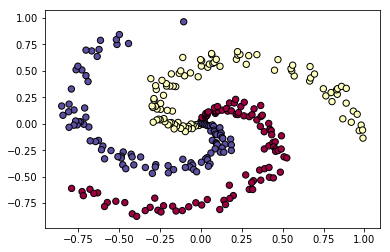

In [121]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes

X, y = generate_data(N, D, K)

plot_data(X, y)

In [122]:
class NeuralNet:
    # D - input dimensionality, h - hidden layer size, K - output classes
    def __init__(self, D, h, K):
        self.W_1 = 0.01 * np.random.randn(D, h)
        self.b_1 = np.zeros((1, h))
        
        self.W_2 = 0.01 * np.random.randn(h, K)
        self.b_2 = np.zeros((1, K))
    
    def train(self, X, y, step_size = 0.5, reg = 1e-3):        
        hidden, scores = self._eval(X)
        
        exp_scores = np.exp(scores)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        num_examples = X.shape [0]
        corect_logprobs = -np.log(probs [range(num_examples), y])

        data_loss = np.sum(corect_logprobs) / num_examples
        reg_loss = 0.5 * reg * np.sum(W * W)
        loss = data_loss + reg_loss      

        dscores = probs
        dscores [range(num_examples), y] -= 1
        dscores /= num_examples
        
        dW_2 = np.dot(hidden.T, dscores)
        db_2 = np.sum(dscores, axis=0, keepdims=True)
        
        dhidden = np.dot(dscores, self.W_2.T)        
        dhidden [hidden <= 0] = 0 # ReLU backprop
        
        dW_1 = np.dot(X.T, dhidden)
        db_1 = np.sum(dhidden, axis=0, keepdims=True)
        
        dW_2 += reg * self.W_2
        dW_1 += reg * self.W_1
        
        self.W_1 += -step_size * dW_1
        self.b_1 += -step_size * db_1
        self.W_2 += -step_size * dW_2
        self.b_2 += -step_size * db_2
        
        return loss
        
    def _eval(self, X):
        hidden = np.maximum(0, np.dot(X, self.W_1) + self.b_1) #ReLU activation
        
        scores = np.dot(hidden, self.W_2) + self.b_2
        
        return hidden, scores
    
    def query(self, X):
        _, scores = self._eval(X)
        
        return scores        
        

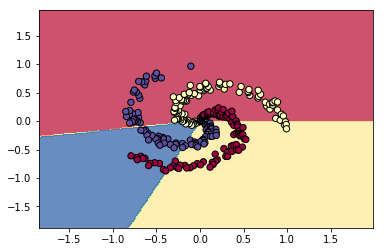

In [123]:
nn = NeuralNet(D, 100, K)

plot_boundaries(X, y, lambda x: nn.query(x))

In [124]:
train_steps = 2000
dump_period = int(train_steps / 5)

for i in range(train_steps):
    loss = nn.train(X, y)
    
    if (i + 1) % dump_period == 0:
        print("iteration %d: loss %f" % (i + 1, loss))
    

iteration 400: loss 0.630413
iteration 800: loss 0.355495
iteration 1200: loss 0.236379
iteration 1600: loss 0.199957
iteration 2000: loss 0.179531


In [125]:
scores = nn.query(X)
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))


training accuracy: 0.95


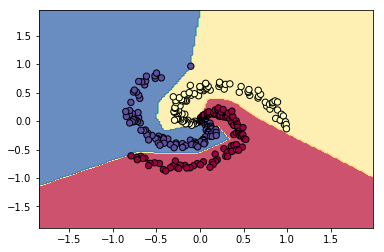

In [126]:
plot_boundaries(X, y, lambda x: nn.query(x))